<a href="https://colab.research.google.com/github/esmika-001/Tuberculosis-Detection-in-X-ray-Images/blob/main/resnet_tb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
# Upload your Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nikhilpandey360/chest-xray-masks-and-labels


Dataset URL: https://www.kaggle.com/datasets/nikhilpandey360/chest-xray-masks-and-labels
License(s): CC0-1.0
100% 9.57G/9.58G [05:55<00:00, 30.6MB/s]
100% 9.58G/9.58G [05:55<00:00, 28.9MB/s]


In [ ]:
# Unzip the dataset
import zipfile
with zipfile.ZipFile('chest-xray-masks-and-labels.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/chest_xray_dataset')


In [ ]:
import os

dataset_dir = '/content/chest_xray_dataset'
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        print(os.path.join(root, file))

/content/chest_xray_dataset/Lung Segmentation/NLM-ChinaCXRSet-ReadMe.docx
/content/chest_xray_dataset/Lung Segmentation/NLM-MontgomeryCXRSet-ReadMe.pdf
/content/chest_xray_dataset/Lung Segmentation/masks/MCUCXR_0017_0.png
/content/chest_xray_dataset/Lung Segmentation/masks/CHNCXR_0605_1_mask.png
/content/chest_xray_dataset/Lung Segmentation/masks/MCUCXR_0080_0.png
/content/chest_xray_dataset/Lung Segmentation/masks/CHNCXR_0074_0_mask.png
/content/chest_xray_dataset/Lung Segmentation/masks/CHNCXR_0003_0_mask.png
/content/chest_xray_dataset/Lung Segmentation/masks/CHNCXR_0375_1_mask.png
/content/chest_xray_dataset/Lung Segmentation/masks/CHNCXR_0457_1_mask.png
/content/chest_xray_dataset/Lung Segmentation/masks/CHNCXR_0309_0_mask.png
/content/chest_xray_dataset/Lung Segmentation/masks/CHNCXR_0042_0_mask.png
/content/chest_xray_dataset/Lung Segmentation/masks/CHNCXR_0232_0_mask.png
/content/chest_xray_dataset/Lung Segmentation/masks/CHNCXR_0142_0_mask.png
/content/chest_xray_dataset/Lung 

**LOAD DATA**

In [ ]:
import os
import pandas as pd
from PIL import Image

**CLEAN DATA**

In [ ]:
# # @title Age
# from matplotlib import pyplot as plt
# df['Age'].plot(kind='hist', bins=20, title='Age')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
image_folder = 'chest_xray_dataset/Lung Segmentation/CXR_png/'
results_folder = 'chest_xray_dataset/Lung Segmentation/ClinicalReadings/'
mask_folder = 'chest_xray_dataset/Lung Segmentation/masks/'

data = []

for filename in os.listdir(results_folder):
    if filename.endswith('.txt'):
        with open(os.path.join(results_folder, filename), 'r') as file:
            lines = file.readlines()
            if len(lines) < 2:
                continue
            gender_age = lines[0].strip().split()
            if len(gender_age) != 2:
                continue
            gender = gender_age[0].lower()
            age_with_units = gender_age[1]
            try:
                age = int(age_with_units.replace('yrs', ''))
            except ValueError:
                continue
            diagnosis = lines[1].strip().lower()

        image_base_name = filename.replace('.txt', '')
        image_path_png = os.path.join(image_folder, image_base_name + '.png')
        image_path_jpg = os.path.join(image_folder, image_base_name + '.jpg')

        if os.path.exists(image_path_png):
            image_path = image_path_png
        elif os.path.exists(image_path_jpg):
            image_path = image_path_jpg
        else:
            continue

        mask_path = os.path.join(mask_folder, image_base_name + '_mask.png')
        if not os.path.exists(mask_path):
            continue

        data.append([image_path, mask_path, gender, age, diagnosis])

df_mask = pd.DataFrame(data, columns=['Image', 'Mask', 'Gender', 'Age', 'Diagnosis'])

print(df_mask);

                                                 Image  \
0    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4    chest_xray_dataset/Lung Segmentation/CXR_png/C...   
..                                                 ...   
543  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
544  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
545  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
546  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
547  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                  Mask  Gender  Age  \
0    chest_xray_dataset/Lung Segmentation/masks/CHN...  female   33   
1    chest_xray_dataset/Lung Segmentation/masks/CHN...    male   54   
2    chest_xray_dataset/Lung Segmentation/masks/CHN...    male   45   
3    chest_xray_dat

In [ ]:
# Check for missing values
print("\nMissing values before dropping:")
print(df_mask.isnull().sum())

df_mask.dropna(inplace=True)

print("\nDataFrame after dropping missing values:")
print(df_mask.head())

df_mask['Gender'] = df_mask['Gender'].replace({'male': 'm', 'female': 'f'})
df_mask = df_mask[df_mask['Diagnosis'].notnull() & (df_mask['Diagnosis'] != '')]

print("\nCleaned DataFrame:")
print(df_mask.head())



Missing values before dropping:
Image        0
Mask         0
Gender       0
Age          0
Diagnosis    0
dtype: int64

DataFrame after dropping missing values:
                                               Image  \
0  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                Mask  Gender  Age  \
0  chest_xray_dataset/Lung Segmentation/masks/CHN...  female   33   
1  chest_xray_dataset/Lung Segmentation/masks/CHN...    male   54   
2  chest_xray_dataset/Lung Segmentation/masks/CHN...    male   45   
3  chest_xray_dataset/Lung Segmentation/masks/CHN...  female   21   
4  chest_xray_dataset/Lung Segmentation/masks/CHN...    male   56   

       Diagnosis  
0                 
1         normal  
2      right ptb  
3        

REFINE and VALIDATE

In [ ]:
print(df_mask.isnull().sum())
df_mask.dropna(inplace=True)  # Option to drop rows with missing values

df_mask['Gender'] = df_mask['Gender'].replace({'male': 'm', 'female': 'f'})

Image        0
Mask         0
Gender       0
Age          0
Diagnosis    0
dtype: int64


In [ ]:
df_mask['Age'] = df_mask['Age'].astype(int)

In [ ]:
df_mask.to_csv('cleaned_lung_xrays_data.csv', index=False)

In [ ]:
df_cleaned = pd.read_csv('cleaned_lung_xrays_data.csv')
print(df_cleaned.head())
print(df_cleaned.info())

                                               Image  \
0  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
1  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
2  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
3  chest_xray_dataset/Lung Segmentation/CXR_png/C...   
4  chest_xray_dataset/Lung Segmentation/CXR_png/C...   

                                                Mask Gender  Age  \
0  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   54   
1  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   45   
2  chest_xray_dataset/Lung Segmentation/masks/CHN...      f   21   
3  chest_xray_dataset/Lung Segmentation/masks/CHN...      m   56   
4  chest_xray_dataset/Lung Segmentation/masks/CHN...      f   34   

       Diagnosis  
0         normal  
1      right ptb  
2         normal  
3  bilateral ptb  
4         normal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtyp

EDA

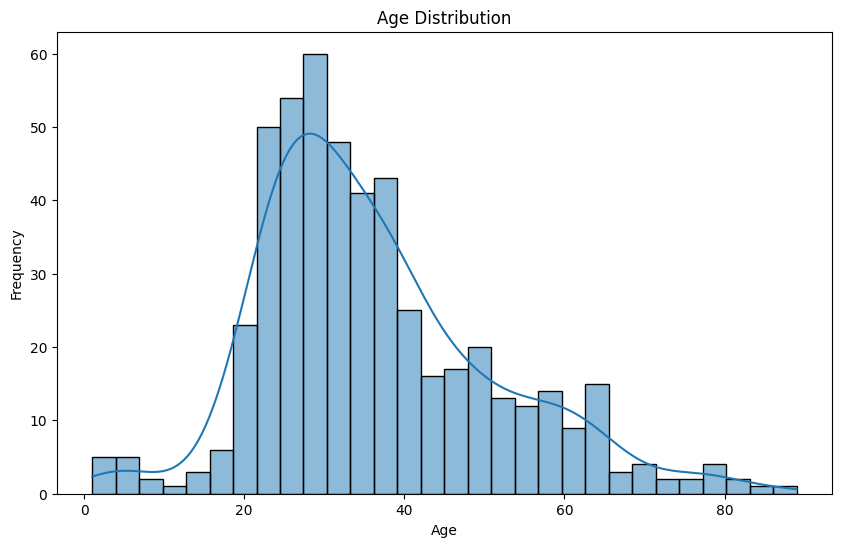

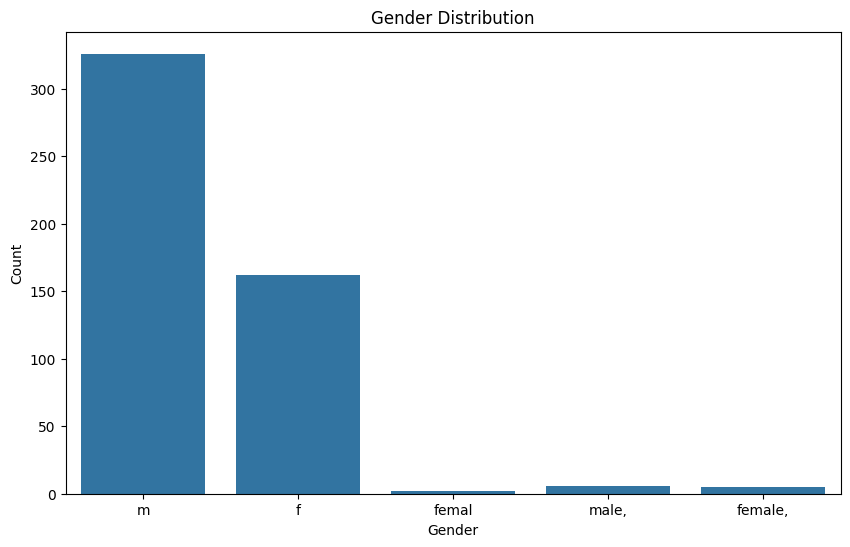

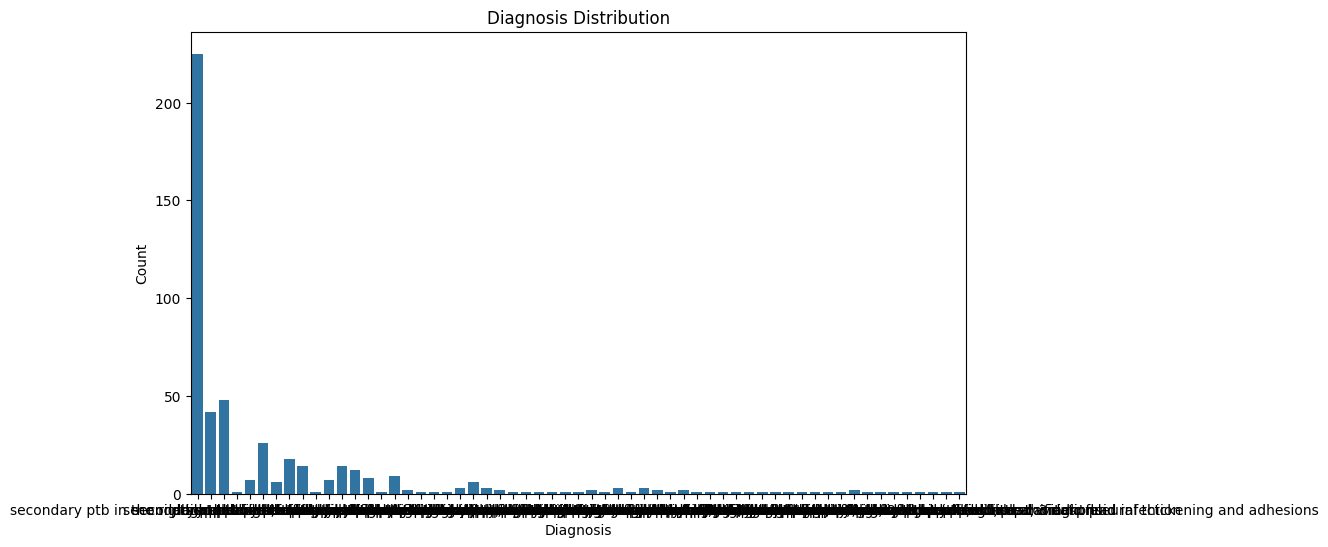

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df_cleaned)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=df_cleaned)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

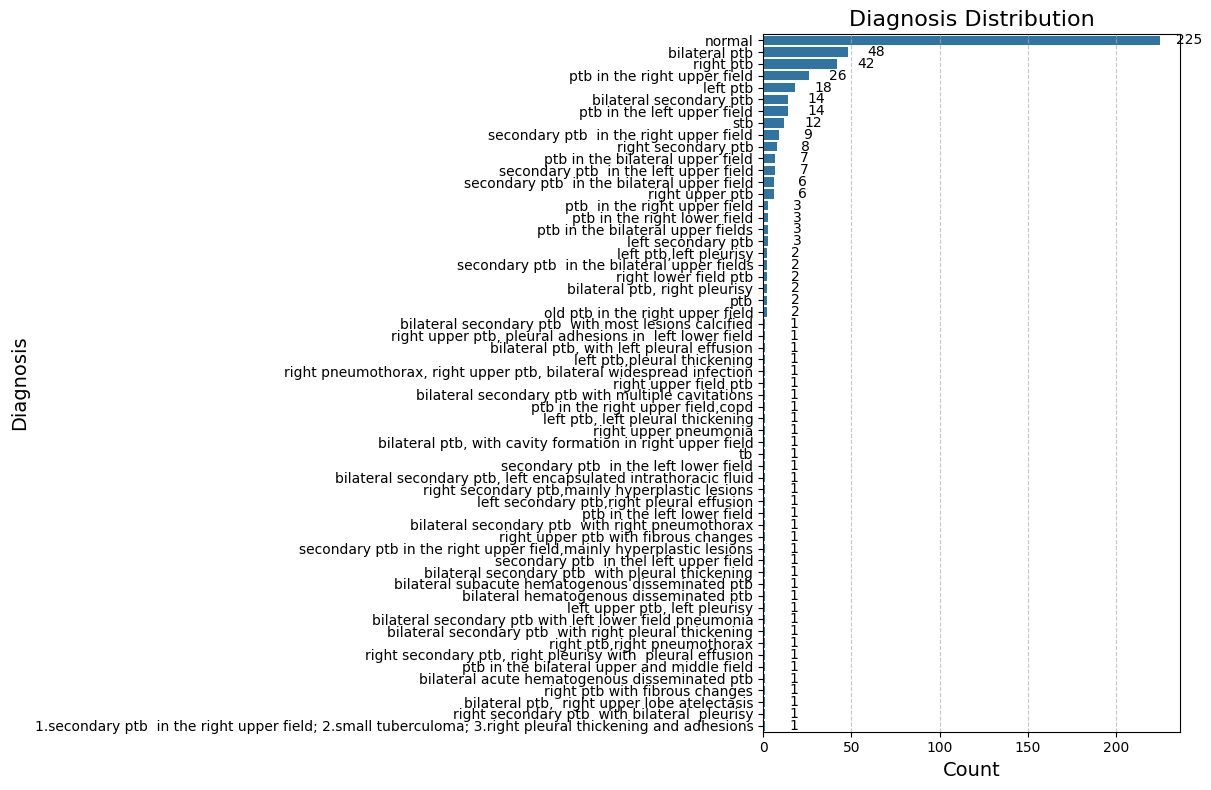

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(y='Diagnosis', data=df_cleaned, order=df_cleaned['Diagnosis'].value_counts().index)
plt.title('Diagnosis Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Diagnosis', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_width(), '.0f'),
                       (p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),
                       ha='center', va='center',
                       xytext=(20, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
df_cleaned['Diagnosis'] = df_cleaned['Diagnosis'].apply(lambda x: 0 if x == 'normal' else 1)
print(df_cleaned['Diagnosis'].value_counts())


Diagnosis
1    276
0    225
Name: count, dtype: int64


Image Preprocessing

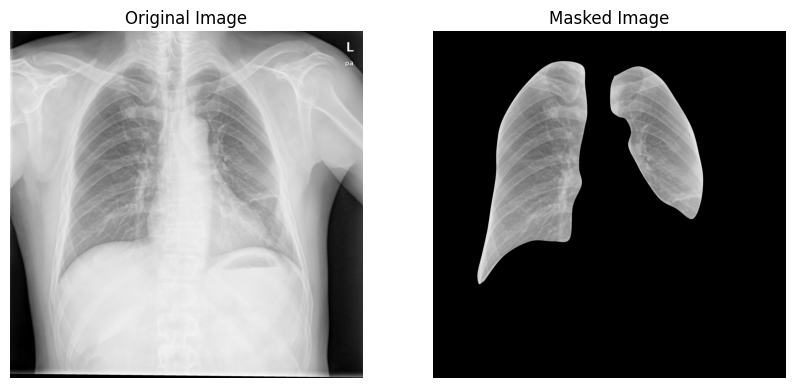

In [ ]:
import cv2

def read_and_preprocess_image(image_path, mask_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    masked_image = cv2.bitwise_and(image, image, mask=mask)

    return masked_image

sample_image_path = df_cleaned['Image'].iloc[0]
sample_mask_path = df_cleaned['Mask'].iloc[0]

sample_image = read_and_preprocess_image(sample_image_path, sample_mask_path)

# Display original and masked image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.imread(sample_image_path))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(sample_image)
axes[1].set_title('Masked Image')
axes[1].axis('off')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


df_train, df_val = train_test_split(df_cleaned, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

# Custom generator
def create_image_generators(df, datagen, batch_size=32, image_size=(256, 256)):
    while True:
        x_batch = []
        y_batch = []
        for _, row in df.iterrows():
            img = load_img(row['Image'], target_size=image_size)
            img = img_to_array(img) / 255.0  # Normalize to [0, 1]
            mask = load_img(row['Mask'], target_size=image_size, color_mode="grayscale")
            mask = img_to_array(mask) / 255.0  # Normalize to [0, 1]
            x_batch.append(img)
            y_batch.append(mask)
            if len(x_batch) == batch_size:
                x_batch = np.array(x_batch, np.float32)
                y_batch = np.array(y_batch, np.float32)
                yield datagen.flow(x_batch, y_batch, batch_size=batch_size, shuffle=True).next()
                x_batch = []
                y_batch = []
        if len(x_batch) > 0:
            x_batch = np.array(x_batch, np.float32)
            y_batch = np.array(y_batch, np.float32)
            yield datagen.flow(x_batch, y_batch, batch_size=len(x_batch), shuffle=True).next()

# Create generators
train_generator = create_image_generators(df_train, train_datagen)
val_generator = create_image_generators(df_val, val_datagen)


RESNET

dice cofficient:overlap between two samples.Dice coefficient is often used as a loss function or evaluation metric in segmentation tasks.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import cv2

df_cleaned = pd.read_csv('cleaned_lung_xrays_data.csv')

# Rename 'Diagnosis' column to 'Label'
df_cleaned['Label'] = df_cleaned['Diagnosis'].apply(lambda x: 0 if x == 'normal' else 1)
df_cleaned.drop(columns=['Diagnosis'], inplace=True)  # Drop the old 'Diagnosis' column

print(df_cleaned['Label'].value_counts())

# Split data into training and validation sets
df_train, df_val = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Custom data generator
def data_generator(df, batch_size=32, image_size=(256, 256)):
    while True:
        batch_images = []
        batch_masks = []
        for index, row in df.iterrows():
            # Read and preprocess the image
            image = cv2.imread(row['Image'])
            image = cv2.resize(image, image_size)
            image_array = image / 255.0

            # Read and preprocess the mask
            mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, image_size)
            mask_array = mask / 255.0

            batch_images.append(image_array)
            batch_masks.append(mask_array)

            if len(batch_images) == batch_size:
                yield np.array(batch_images), np.array(batch_masks)
                batch_images = []
                batch_masks = []

        if len(batch_images) > 0:
            yield np.array(batch_images), np.array(batch_masks)

# Define the model architecture using ResNet50
def resnet_model(input_shape):
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    inputs = tf.keras.layers.Input(input_shape)
    x = base_model(inputs, training=False)

    # Upsampling
    x = tf.keras.layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)

    x = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=x)
    return model

# Define custom loss function
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

# Compile the model
input_shape = (256, 256, 3)
model = resnet_model(input_shape)
model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coefficient, 'accuracy'])

# Set batch size and number of epochs
batch_size = 32
epochs = 60

# Create data generators for training and validation
train_generator = data_generator(df_train, batch_size=batch_size)
val_generator = data_generator(df_val, batch_size=batch_size)

# Calculate steps per epoch and validation steps
steps_per_epoch = len(df_train) // batch_size
validation_steps = len(df_val) // batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=validation_steps
)

# Optionally, save the trained model
model.save('lung_xrays_resnet_model.h5')


Label
1    276
0    225
Name: count, dtype: int64
94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/60
12/12 [==============================] - 349s 29s/step - loss: 0.6021 - dice_coefficient: 0.3979 - accuracy: 0.2945 - val_loss: 0.5690 - val_dice_coefficient: 0.4310 - val_accuracy: 0.2483
Epoch 2/60
12/12 [==============================] - 306s 27s/step - loss: 0.5422 - dice_coefficient: 0.4587 - accuracy: 0.2542 - val_loss: 0.5045 - val_dice_coefficient: 0.5081 - val_accuracy: 0.2608
Epoch 3/60
12/12 [==============================] - 344s 29s/step - loss: 0.4975 - dice_coefficient: 0.5036 - accuracy: 0.6556 - val_loss: 0.4903 - val_dice_coefficient: 0.5242 - val_accuracy: 0.7702
Epoch 4/60
12/12 [==============================] - 340s 29s/step - loss: 0.4836 - dice_coefficient: 0.5176 - accuracy: 0.7907 - val_loss: 0.4962 - val_dice_coefficient: 0.5244 - val_accuracy: 0.8090
Epoch 5/60
12/12 [==============================] - 352s 30s/step - loss: 0.4765 - di

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


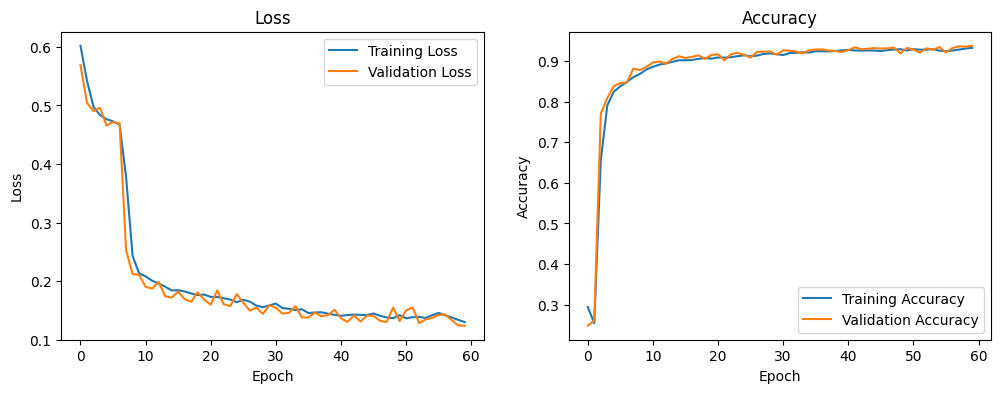

Loaded best model weights from lung_xrays_resnet_model.h5


In [ ]:
import os
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit

# Plot training history
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Check if the best model file exists and load the weights
model_path = 'lung_xrays_resnet_model.h5'
if os.path.exists(model_path):
    model.load_weights(model_path)
    print(f"Loaded best model weights from {model_path}")
else:
    print(f"Best model file not found at {model_path}. Ensure the training process saved the best model.")



1/1 [==============================] - 3s 3s/step
Precision: 0.8826637349369503
Recall: 0.864830000589086
F1 Score: 0.8736558682720544
Confusion Matrix:
 [[4764286  191256]
 [ 224868 1438726]]
Classification Report:
               precision    recall  f1-score   support

      Normal       0.95      0.96      0.96   4955542
    Abnormal       0.88      0.86      0.87   1663594

    accuracy                           0.94   6619136
   macro avg       0.92      0.91      0.92   6619136
weighted avg       0.94      0.94      0.94   6619136



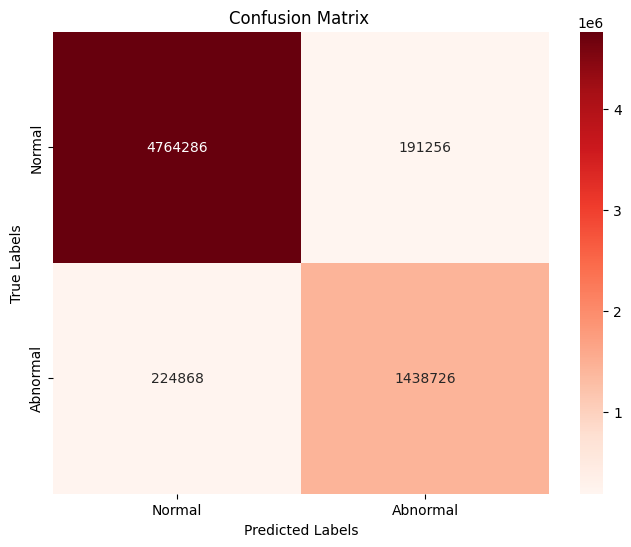

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np
import cv2
import tensorflow as tf
import pandas as pd

# Custom functions (placeholders)
def dice_loss(y_true, y_pred):
    pass

def dice_coefficient(y_true, y_pred):
    pass

# Load the trained model
model = tf.keras.models.load_model('lung_xrays_resnet_model.h5', custom_objects={'dice_loss': dice_loss, 'dice_coefficient': dice_coefficient})

# Create data generator for the validation set
def data_generator_for_evaluation(df, batch_size=32, image_size=(256, 256)):
    batch_images = []
    batch_masks = []
    for index, row in df.iterrows():
        # Read and preprocess the image
        image = cv2.imread(row['Image'])
        image = cv2.resize(image, image_size)
        image_array = image / 255.0

        # Read and preprocess the mask
        mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, image_size)
        mask_array = mask / 255.0

        batch_images.append(image_array)
        batch_masks.append(mask_array)

        if len(batch_images) == batch_size:
            yield np.array(batch_images), np.array(batch_masks)
            batch_images = []
            batch_masks = []

    if len(batch_images) > 0:
        yield np.array(batch_images), np.array(batch_masks)

# Assuming df_val is your DataFrame containing validation data
# Example: df_val = pd.read_csv('validation_data.csv')

batch_size = 32  # Set your desired batch size

# Generate predictions for the validation set
val_generator = data_generator_for_evaluation(df_val, batch_size=batch_size)
y_true = []
y_pred = []

for images, masks in val_generator:
    predictions = model.predict(images)
    y_true.extend(masks)
    y_pred.extend(predictions)

# Convert to numpy arrays
y_true = np.array(y_true).reshape(-1)
y_pred = np.array(y_pred).reshape(-1)

# Binarize the predictions and true labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_true_binary = (y_true > threshold).astype(int)

# Calculate precision, recall, F1 score, and confusion matrix
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)
conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)
class_report = classification_report(y_true_binary, y_pred_binary, target_names=['Normal', 'Abnormal'])

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix with magma color scheme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import itertools

# Predict probabilities for validation set
val_generator = data_generator_for_evaluation(df_val, batch_size=batch_size)
val_data = [(images, masks) for images, masks in val_generator]

y_pred = []
y_true = []

for images, masks in val_data:
    predictions = model.predict(images)
    y_pred.extend(predictions)
    y_true.extend(masks)

y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Convert predictions to binary class labels
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

print(y_true.shape, y_true.dtype)
print(y_pred_classes.shape, y_pred_classes.dtype)


1/1 [==============================] - 2s 2s/step
(101, 256, 256) float64
(101, 256, 256, 1) int64


In [ ]:
y_true_flat = y_true.reshape(-1)
y_pred_classes_flat = y_pred_classes.reshape(-1)

# Ensure that y_true_flat and y_pred_classes_flat contain only binary values
y_true_flat = np.where(y_true_flat > 0.5, 1, 0)
y_pred_classes_flat = np.where(y_pred_classes_flat > 0.5, 1, 0)

accuracy = accuracy_score(y_true_flat, y_pred_classes_flat)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9371


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate precision
precision = precision_score(y_true_flat, y_pred_classes_flat)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_true_flat, y_pred_classes_flat)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_true_flat, y_pred_classes_flat)
print(f'F1 score: {f1:.4f}')

# Calculate confusion matrix
conf_mat = confusion_matrix(y_true_flat, y_pred_classes_flat)
print('Confusion matrix:')
print(conf_mat)

# Calculate classification report
class_report = classification_report(y_true_flat, y_pred_classes_flat)
print('Classification report:')
print(class_report)

Precision: 0.8827
Recall: 0.8648
F1 score: 0.8737
Confusion matrix:
[[4764286  191256]
 [ 224868 1438726]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96   4955542
           1       0.88      0.86      0.87   1663594

    accuracy                           0.94   6619136
   macro avg       0.92      0.91      0.92   6619136
weighted avg       0.94      0.94      0.94   6619136



1/1 [==============================] - 0s 392ms/step
Confusion matrix, without normalization
[[101]]


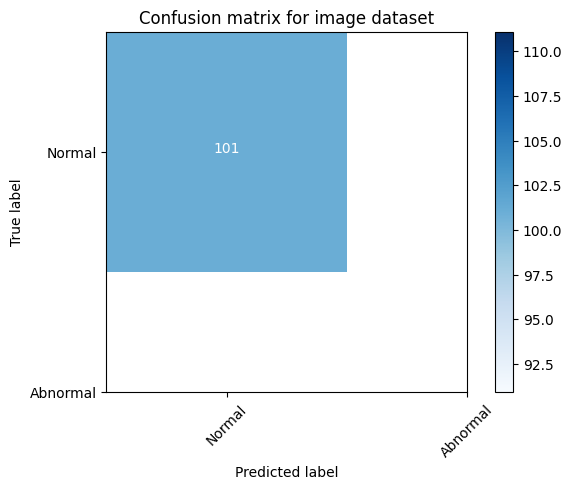

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Calculate the true labels and predicted labels for each image
y_true_images = []
y_pred_images = []

for index, row in df_val.iterrows():
    image = cv2.imread(row['Image'])
    image = cv2.resize(image, (256, 256))
    image_array = image / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (256, 256))
    mask_array = mask / 255.0

    prediction = model.predict(image_array)
    y_pred_class = np.where(prediction > 0.5, 1, 0)
    y_pred_images.append(1 if np.any(y_pred_class) else 0)
    y_true_images.append(1 if np.any(mask_array) else 0)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_true_images, y_pred_images)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [i for i in range(len(classes))]
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# # Define the class labels
# class_labels = ['Normal', 'Abnormal']  # Replace with your class labels

# # Plot the confusion matrix
# plot_confusion_matrix(conf_mat, class_labels, title='Confusion matrix for image dataset')
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize= True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [i for i in range(len(classes))]
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# # Define the confusion matrix
# conf_mat = np.array([[90, 10], [5, 95]])

# Define the class labels
class_labels = ['Normal', 'Abnormal']

# Plot the confusion matrix
plot_confusion_matrix(conf_mat, class_labels, title='Confusion matrix for image dataset')
plt.show()
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true labels and predicted labels, respectively

target_names = ['Normal', 'Abnormal']  # Define the class labels

# Generate the classification report
class_report = classification_report(y_true_flat, y_pred_classes_flat)
print('Classification report:')
print(class_report)

NameError: name 'conf_mat' is not defined

end

In [ ]:
import tensorflow as tf
import numpy as np
import cv2

# Load the trained model
model = tf.keras.models.load_model('lung_xrays_resnet_model.h5', custom_objects={'dice_loss': dice_loss, 'dice_coefficient': dice_coefficient})

# Create data generator for the validation set
def data_generator_for_evaluation(df, batch_size=32, image_size=(256, 256)):
    batch_images = []
    batch_masks = []
    for index, row in df.iterrows():
        # Read and preprocess the image
        image = cv2.imread(row['Image'])
        image = cv2.resize(image, image_size)
        image_array = image / 255.0

        # Read and preprocess the mask
        mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, image_size)
        mask_array = mask / 255.0

        batch_images.append(image_array)
        batch_masks.append(mask_array)

        if len(batch_images) == batch_size:
            yield np.array(batch_images), np.array(batch_masks)
            batch_images = []
            batch_masks = []

    if len(batch_images) > 0:
        yield np.array(batch_images), np.array(batch_masks)

# Generate validation data generator
val_generator = data_generator_for_evaluation(df_val, batch_size=batch_size)

# Calculate validation accuracy
val_accuracy = model.evaluate(val_generator, verbose=1)

# Assuming your model has metrics like accuracy set during compile, it should output accuracy
print("Validation Accuracy:", val_accuracy)

# If you specifically want to calculate the accuracy over the predicted masks
y_true = []
y_pred = []

for images, masks in val_generator:
    predictions = model.predict(images)
    y_true.extend(masks)
    y_pred.extend(predictions)

# Convert to numpy arrays
y_true = np.array(y_true).reshape(-1)
y_pred = np.array(y_pred).reshape(-1)

# Binarize the predictions and true labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_true_binary = (y_true > threshold).astype(int)

# Calculate accuracy
accuracy = np.mean(y_true_binary == y_pred_binary)

print("Calculated Accuracy:", accuracy)


4/4 [==============================] - 47s 9s/step - loss: 0.1413 - dice_coefficient: 0.8656 - accuracy: 0.9255
Validation Accuracy: [0.14127673208713531, 0.86561119556427, 0.9255009889602661]
Calculated Accuracy: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# import numpy as np
# import tensorflow as tf

# # Load the trained model
# model = tf.keras.models.load_model('lung_xrays_resnet_model.h5', custom_objects={'dice_loss': dice_loss, 'dice_coefficient': dice_coefficient})

# # Create data generator for the validation set
# def data_generator_for_evaluation(df, batch_size=32, image_size=(256, 256)):
#     batch_images = []
#     batch_masks = []
#     for index, row in df.iterrows():
#         # Read and preprocess the image
#         image = cv2.imread(row['Image'])
#         image = cv2.resize(image, image_size)
#         image_array = image / 255.0

#         # Read and preprocess the mask
#         mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
#         mask = cv2.resize(mask, image_size)
#         mask_array = mask / 255.0

#         batch_images.append(image_array)
#         batch_masks.append(mask_array)

#         if len(batch_images) == batch_size:
#             yield np.array(batch_images), np.array(batch_masks)
#             batch_images = []
#             batch_masks = []

#     if len(batch_images) > 0:
#         yield np.array(batch_images), np.array(batch_masks)

# # Generate predictions for the validation set
# val_generator = data_generator_for_evaluation(df_val, batch_size=batch_size)
# y_true = []
# y_pred = []

# for images, masks in val_generator:
#     predictions = model.predict(images)
#     y_true.extend(masks)
#     y_pred.extend(predictions)

# # Convert to numpy arrays
# y_true = np.array(y_true).reshape(-1)
# y_pred = np.array(y_pred).reshape(-1)

# # Binarize the predictions and true labels
# threshold = 0.5
# y_pred_binary = (y_pred > threshold).astype(int)
# y_true_binary = (y_true > threshold).astype(int)

# # Calculate precision, recall, F1 score, and confusion matrix
# precision = precision_score(y_true_binary, y_pred_binary)
# recall = recall_score(y_true_binary, y_pred_binary)
# f1 = f1_score(y_true_binary, y_pred_binary)
# conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)
# print("Confusion Matrix:\n", conf_matrix)


1/1 [==============================] - 4s 4s/step
Precision: 0.8241430725109676
Recall: 0.8980809019508366
F1 Score: 0.8595248526005218
Confusion Matrix:
 [[4636741  318801]
 [ 169552 1494042]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import numpy as np
import tensorflow as tf
import cv2

# Assuming dice_loss and dice_coefficient are defined elsewhere
# Load the trained model
model = tf.keras.models.load_model('lung_xrays_resnet_model.h5', custom_objects={'dice_loss': dice_loss, 'dice_coefficient': dice_coefficient})

# Create data generator for the validation set
def data_generator_for_evaluation(df, batch_size=32, image_size=(256, 256)):
    batch_images = []
    batch_masks = []
    for index, row in df.iterrows():
        # Read and preprocess the image
        image = cv2.imread(row['Image'])
        image = cv2.resize(image, image_size)
        image_array = image / 255.0

        # Read and preprocess the mask
        mask = cv2.imread(row['Mask'], cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, image_size)
        mask_array = mask / 255.0

        batch_images.append(image_array)
        batch_masks.append(mask_array)

        if len(batch_images) == batch_size:
            yield np.array(batch_images), np.array(batch_masks)
            batch_images = []
            batch_masks = []

    if len(batch_images) > 0:
        yield np.array(batch_images), np.array(batch_masks)

# Generate validation data generator
val_generator = data_generator_for_evaluation(df_val, batch_size=batch_size)
y_true = []
y_pred = []

for images, masks in val_generator:
    predictions = model.predict(images)
    y_true.extend(masks)
    y_pred.extend(predictions)

# Convert to numpy arrays
y_true = np.array(y_true).reshape(-1)
y_pred = np.array(y_pred).reshape(-1)

# Binarize the predictions and true labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_true_binary = (y_true > threshold).astype(int)

# Calculate precision, recall, F1 score, accuracy, and confusion matrix
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)
accuracy = accuracy_score(y_true_binary, y_pred_binary)
conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


1/1 [==============================] - 3s 3s/step
Precision: 0.8241430725109676
Recall: 0.8980809019508366
F1 Score: 0.8595248526005218
Accuracy: 0.9262210354946627
Confusion Matrix:
 [[4636741  318801]
 [ 169552 1494042]]


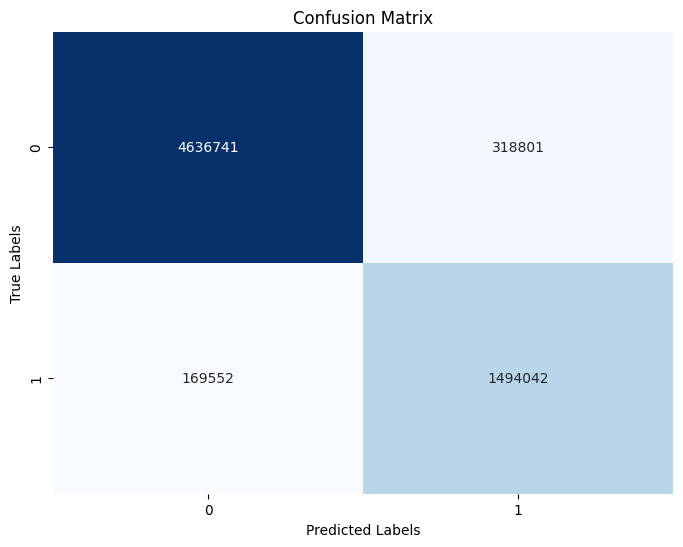

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix)


Sequential

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd

# Replace this with your actual DataFrame containing the cleaned data
df_cleaned = pd.read_csv('cleaned_lung_xrays_data.csv')

# Map diagnoses to binary labels: 0 for 'normal' and 1 for 'abnormal'
df_cleaned['Diagnosis'] = df_cleaned['Diagnosis'].apply(lambda x: 'abnormal' if 'ptb' in str(x).lower() else 'normal')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['Image'], df_cleaned['Diagnosis'], test_size=0.2, random_state=42)

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=df_cleaned, x_col='Image', y_col='Diagnosis',
                                                    target_size=(150, 150), batch_size=8, class_mode='binary',
                                                    subset='training', shuffle=True)

test_generator = test_datagen.flow_from_dataframe(dataframe=df_cleaned, x_col='Image', y_col='Diagnosis',
                                                  target_size=(150, 150), batch_size=8, class_mode='binary',
                                                  subset='validation', shuffle=False)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=100, validation_data=test_generator, validation_steps=len(test_generator))


# train_dataset,
#     steps_per_epoch=len(df_train) // 4,
#     validation_data=val_dataset,
#     validation_steps=len(df_val) // 4,
#     epochs=50,
#     callbacks=callbacks


#accuracy 91.62 epoch94

Found 501 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 75s 1s/step - loss: 0.7391 - accuracy: 0.5669
Epoch 2/100
37/63 [================>.............] - ETA: 29s - loss: 0.6590 - accuracy: 0.6246

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt                               #accuracy 91.62 epoch94

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test set
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Get true labels from the test generator
y_true = test_generator.classes

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_binary, target_names=['Normal', 'Abnormal']))
